In [1]:
import spacy

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

In [3]:
nlp=spacy.load('en_core_web_md')

In [4]:
import gensim
from gensim.models import word2vec

In [6]:
import pandas as pd
df = pd.read_json('../Dataset/Resume_1.json')

In [7]:
text_1 = df['Person 2'][0]

In [8]:
import Distill 

In [9]:
print(text_1)

Akhil Yadav Polemaina
Hyderabad, Telangana - Email me on Indeed: indeed.com/r/Akhil-Yadav-Polemaina/
f6931801c51c63b1

● Senior System Engineer at Infosys with 3.2 years of experience in software development and
Maintenance.
● Maintained data processing using mainframe technology for multiple front end applications of
Walmart Retail Link platform and ensured on-time deliverables.
● Worked on automating the uses cases to reduce manual effort in solving repeating incidents
using Service Now orchestration.
● Possess good analytical, logical ability and systematic approach to problem analysis, strong
debugging and troubleshooting skills.
● Good exposure to Retail domain.

Willing to relocate to: hyderbad, Telangana

WORK EXPERIENCE

Senior Systems Engineer

Infosys Limited -  Hyderabad, Telangana -

January 2015 to Present

● Working on all the Major and Minor Enhancement requests as part of Maintenance and Support
activities
● Identifying and fixing all the major defects in the applicatio

In [10]:
# Creating a cleaning pipeline to clean and remove extra words as well as lemmatize the text

def clean_text(text):
    text = Distill.tokenize(text)
    text = Distill.remove_stopwords(text)
    text = Distill.remove_tags(text)
    text = Distill.lemmatize(text)
    return text


    

In [11]:
# text = clean_text(text_1)

In [12]:
# text = Distill._to_string(text)

In [13]:
text3 = Distill.tokenize(text_1)

In [14]:
text3 = Distill.remove_stopwords(text3)

In [15]:
text3 = Distill.remove_tags(text3)

In [16]:
text3 = Distill.lemmatize(text3)

In [17]:
sent = " ".join(text3)

In [18]:
sent

'indeed indeedcomrakhilyadavpolemaina year experience software development datum processing use mainframe technology multiple front end application platform ensure ontime deliverable work automate use case reduce manual effort solve repeat incident use now orchestration good analytical logical ability systematic approach problem analysis strong debugging troubleshooting skill good exposure retail domain willing relocate hyderbad present request part maintenance activity identify fix major defect application perform root cause analysis production issue subject matter expert involve multiple knowledge transfer knowledge sharing session client lead peer group take end end responsibility critical issue enhancement identify use case automate use now workflow automate various task involve manual intervention direct interaction client various business impact issue daily basis set meeting meeting client Project Objective provide end end maintenance support activity datum processing critical im

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)


In [21]:
X = vectorizer.fit_transform(text3)

In [22]:
X.shape

(264, 133)

In [23]:
from sklearn.decomposition import TruncatedSVD

In [24]:
svd_model = TruncatedSVD(n_components=10
                         , algorithm='randomized', n_iter=100, random_state=122)

In [25]:
svd_model.fit(X)

TruncatedSVD(n_components=10, n_iter=100, random_state=122)

In [26]:
len(svd_model.components_)

10

In [27]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
use
 
involve
 
ability
 
year
 
various
 
client
 
analysis
 
Topic 1: 
end
 
involve
 
use
 
client
 
ability
 
analysis
 
analytical
 
Topic 2: 
various
 
client
 
issue
 
analysis
 
activity
 
major
 
manual
 
Topic 3: 
year
 
issue
 
client
 
activity
 
automate
 
involve
 
critical
 
Topic 4: 
client
 
year
 
activity
 
application
 
responsibility
 
automate
 
work
 
Topic 5: 
year
 
various
 
automate
 
activity
 
analysis
 
analytical
 
daily
 
Topic 6: 
application
 
activity
 
automate
 
knowledge
 
critical
 
meeting
 
issue
 
Topic 7: 
automate
 
activity
 
knowledge
 
meeting
 
multiple
 
work
 
issue
 
Topic 8: 
involve
 
automate
 
application
 
activity
 
critical
 
various
 
knowledge
 
Topic 9: 
activity
 
involve
 
various
 
analysis
 
end
 
datum
 
critical
 


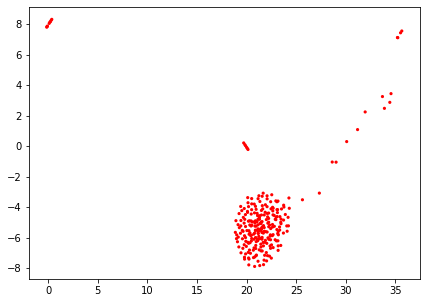

In [31]:
import umap

X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = 'r',
s = 10, # size
edgecolor='none'
)
plt.show()